# SMS Spam Collection

In [1]:
!pip install kagglehub


## Importando o dataFrame do Kaggle para pasta local.

In [2]:
import kagglehub
import shutil
import os

# Baixando o dataset
download_path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

# Definindo o diretório de trabalho (onde você está)
current_dir = os.getcwd()

# Movendo arquivos baixados para a pasta atual
for file_name in os.listdir(download_path):
    shutil.move(os.path.join(download_path, file_name), current_dir)

print("Files moved to the current directory:", current_dir)

Arquivos movidos para a pasta atual: d:\estudo generalista\estudo data\SMS-Spam-Classifier


## Import libs

- Machine learning techniques
- NLP techniques
- General analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('stopwords')
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
# Instanciando um variavel para o dataframe
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.dropna(how="any",inplace=True,axis=1) # Removendo os NaN, valores que falta.
sms.columns = ['label', 'message'] # Colocal nome nas colunas alvo
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.describe()


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
description = sms.groupby('label').describe()
count_ham = description.loc['ham', ('message', 'count')]
count_spam = description.loc['spam', ('message', 'count')]

print(f"Count de ham: {count_ham} \nCount de spam:  {count_spam}")

Count de ham: 4825 
Count de spam:  747


In [7]:
# Seperando o ham do spam
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

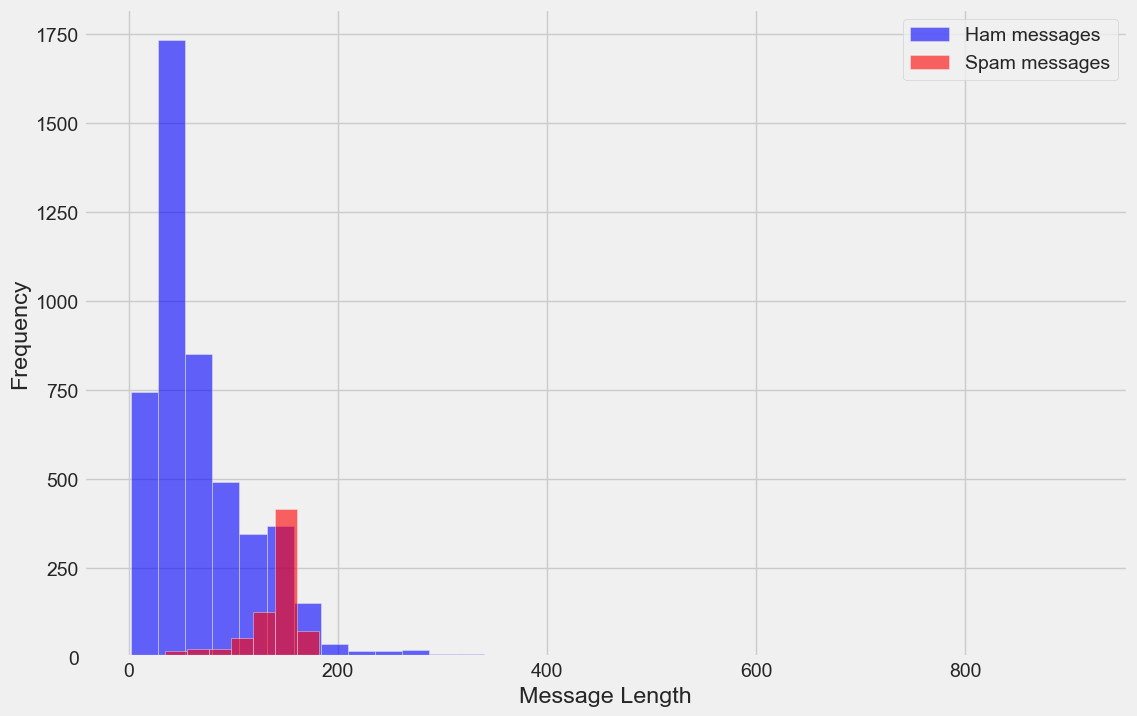

In [8]:
plt.figure(figsize=(12,8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist',color = 'blue', label = 'Ham messages', alpha =0.6)
sms[sms.label=='spam'].message_len.plot( kind='hist',color = 'red', label = 'Spam messages', alpha =0.6)

plt.legend()
plt.xlabel("Message Length")

In [9]:
sms[sms.label=='ham'].describe()


,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [10]:
sms[sms.label=='spam'].describe()


,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


# Text pre-processing

In [21]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    stopword = stopwords.words('english' )+['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopword])

In [22]:
# cleaning messagens and '' tokenize''
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [ ]:
## Loocking for a common words in spam/ham

In [24]:
from collections import Counter

words = sms[sms.label == 'ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [25]:
from collections import Counter

words = sms[sms.label == 'spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


# Vectorization

Currently , we have the messages as list of tokens, and now we need to convert in vector the Scikit Learn'n algorithm models can work.

In [30]:

from sklearn.model_selection import train_test_split
# Split X and y (from sms data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

(5572,)
(5572,)
X_train:  (4179,)
X_test:  (1393,)
y_train:  (4179,)
y_test:  (1393,)


In [35]:
# COUNTVECTORIZER
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)

# fit and tranform
X_train_dtm = vect.fit_transform(X_train)
print(type(X_train_dtm), X_train_dtm.shape)


X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)


<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_tranformer = TfidfTransformer()
tfidf_tranformer.fit(X_train_dtm)
tfidf_tranformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

# Building and evaluating a model

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

%time nb.fit(X_train_dtm,y_train)

CPU times: total: 15.6 ms
Wall time: 7.52 ms


MultinomialNB()

In [40]:
from sklearn import metrics

y_pred_class = nb.predict(X_test_dtm)

print('--Accyracy Score')
print(metrics.accuracy_score(y_test, y_pred_class))
print('--Confusion Matrix--')
print(metrics.confusion_matrix(y_test, y_pred_class))

--Accyracy Score
0.9827709978463748
--Confusion Matrix--
[[1205    8]
 [  16  164]]


In [41]:
# print message text for false positives (ham incorrectly classifier)
X_test[y_pred_class > y_test]


2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: clean_msg, dtype: object

In [43]:
# print message text for false negatives (spam incorrectly classifier)

X_test[y_pred_class < y_test]


4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: clean_msg, dtype: object

In [44]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.11903975e-02, 3.97831612e-04, 1.06470895e-03, ...,
       1.31939653e-02, 9.99821127e-05, 6.04083365e-06])

In [45]:
# calculate AUC
metrics.roc_auc_score(y_test,y_pred_prob)

0.9774342768159751

=======Accuracy Score===========
0.9669777458722182
=======Confision Matrix===========


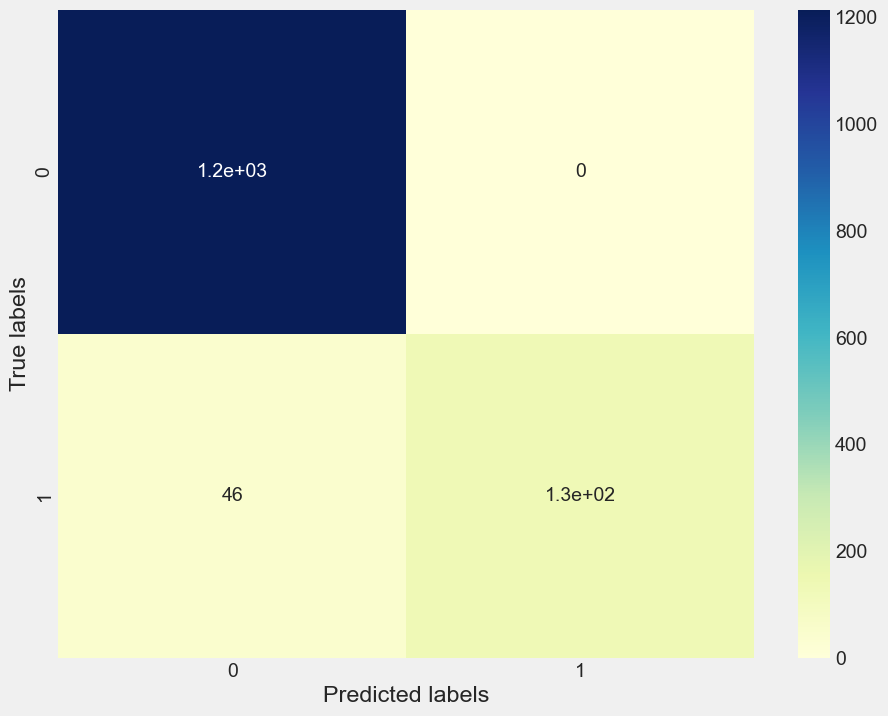

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()